In [93]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

# DataFrame Intro

In [2]:
data = {
    'name': ['Xavier', 'Ann', 'Jana', 'Yi', 'Robin', 'Amal', 'Nori'],
    'city': ['Mexico City', 'Toronto', 'Prague', 'Shanghai',
             'Manchester', 'Cairo', 'Osaka'],
    'age': [41, 28, 33, 34, 38, 31, 37],
    'py-score': [88.0, 79.0, 81.0, 80.0, 68.0, 61.0, 84.0]
}

In [3]:
row_labels = [100 + i for i in range(1,8)]

In [4]:
row_labels

[101, 102, 103, 104, 105, 106, 107]

Let's now create a Pandas dataframe using this information.

In [5]:
df = pd.DataFrame(data=data, index=row_labels)
df

,name,city,age,py-score
101,Xavier,Mexico City,41,88.0
102,Ann,Toronto,28,79.0
103,Jana,Prague,33,81.0
104,Yi,Shanghai,34,80.0
105,Robin,Manchester,38,68.0
106,Amal,Cairo,31,61.0
107,Nori,Osaka,37,84.0


In [6]:
df.city

101    Mexico City
102        Toronto
103         Prague
104       Shanghai
105     Manchester
106          Cairo
107          Osaka
Name: city, dtype: object

In [7]:
df.loc[103]

name          Jana
city        Prague
age             33
py-score        81
Name: 103, dtype: object

In [8]:
l = [[1, 2, 100],
    [2, 4, 100],
    [3, 8, 100]]

In [9]:
pd.DataFrame(l, columns=['x','y','z'])

,x,y,z
0,1,2,100
1,2,4,100
2,3,8,100


## Creating a DF from a CSV

In [10]:
# Create a CSV from the df
df.to_csv('data.csv')

In [11]:
pd.read_csv('data.csv', index_col=0)

,name,city,age,py-score
101,Xavier,Mexico City,41,88.0
102,Ann,Toronto,28,79.0
103,Jana,Prague,33,81.0
104,Yi,Shanghai,34,80.0
105,Robin,Manchester,38,68.0
106,Amal,Cairo,31,61.0
107,Nori,Osaka,37,84.0


In [12]:
df.index

Int64Index([101, 102, 103, 104, 105, 106, 107], dtype='int64')

In [13]:
df.columns

Index(['name', 'city', 'age', 'py-score'], dtype='object')

In [14]:
df.index = np.arange(10, 17)

In [15]:
df

,name,city,age,py-score
10,Xavier,Mexico City,41,88.0
11,Ann,Toronto,28,79.0
12,Jana,Prague,33,81.0
13,Yi,Shanghai,34,80.0
14,Robin,Manchester,38,68.0
15,Amal,Cairo,31,61.0
16,Nori,Osaka,37,84.0


## Data as NumPy Arrays

In [16]:
df.to_numpy()

array([['Xavier', 'Mexico City', 41, 88.0],
       ['Ann', 'Toronto', 28, 79.0],
       ['Jana', 'Prague', 33, 81.0],
       ['Yi', 'Shanghai', 34, 80.0],
       ['Robin', 'Manchester', 38, 68.0],
       ['Amal', 'Cairo', 31, 61.0],
       ['Nori', 'Osaka', 37, 84.0]], dtype=object)

In [17]:
df.values

array([['Xavier', 'Mexico City', 41, 88.0],
       ['Ann', 'Toronto', 28, 79.0],
       ['Jana', 'Prague', 33, 81.0],
       ['Yi', 'Shanghai', 34, 80.0],
       ['Robin', 'Manchester', 38, 68.0],
       ['Amal', 'Cairo', 31, 61.0],
       ['Nori', 'Osaka', 37, 84.0]], dtype=object)

# Data Types

In [18]:
df.dtypes

name         object
city         object
age           int64
py-score    float64
dtype: object

In [19]:
df_ = df.astype(dtype={'age': np.int32, 'py-score': np.float32})

In [20]:
df_.dtypes

name         object
city         object
age           int32
py-score    float32
dtype: object

In [21]:
df_.memory_usage()

Index       56
name        56
city        56
age         28
py-score    28
dtype: int64

# Data Accessors

In [22]:
df.loc[10]

name             Xavier
city        Mexico City
age                  41
py-score             88
Name: 10, dtype: object

In [23]:
df.iloc[0]

name             Xavier
city        Mexico City
age                  41
py-score             88
Name: 10, dtype: object

In [24]:
df.loc[:,'city']

10    Mexico City
11        Toronto
12         Prague
13       Shanghai
14     Manchester
15          Cairo
16          Osaka
Name: city, dtype: object

In [25]:
df.iloc[:,1]

10    Mexico City
11        Toronto
12         Prague
13       Shanghai
14     Manchester
15          Cairo
16          Osaka
Name: city, dtype: object

In [26]:
df.loc[11:15,['name','city']]

,name,city
11,Ann,Toronto
12,Jana,Prague
13,Yi,Shanghai
14,Robin,Manchester
15,Amal,Cairo


In [27]:
df.iloc[1:6,[0,1]]

,name,city
11,Ann,Toronto
12,Jana,Prague
13,Yi,Shanghai
14,Robin,Manchester
15,Amal,Cairo


In [28]:
# Use the python slice() method
df.iloc[slice(1,6,2),0]

11     Ann
13      Yi
15    Amal
Name: name, dtype: object

In [29]:
# Use NumPy's np.s_
df.iloc[np.s_[1:6:2],0]

11     Ann
13      Yi
15    Amal
Name: name, dtype: object

In [30]:
# Use Pandas' IndexSlice
df.iloc[pd.IndexSlice[1:6:2],0]

11     Ann
13      Yi
15    Amal
Name: name, dtype: object

## Getting single values

In [31]:
df.at[12,'name']

'Jana'

In [32]:
df.iat[2,0]

'Jana'

## Setting Data with Accessors

You can also use the accessor operators to modify data

In [33]:
df.loc[:,'py-score']

10    88.0
11    79.0
12    81.0
13    80.0
14    68.0
15    61.0
16    84.0
Name: py-score, dtype: float64

In [34]:
df.loc[:13,'py-score'] = [40, 50, 60, 70]
df.loc[14:,'py-score'] = 0

In [35]:
df['py-score']

10    40.0
11    50.0
12    60.0
13    70.0
14     0.0
15     0.0
16     0.0
Name: py-score, dtype: float64

In [36]:
df.iloc[:,-1] = np.array([88.0, 79.0, 81.0, 80.0, 68.0, 61.0, 84.0])

In [37]:
df['py-score']

10    88.0
11    79.0
12    81.0
13    80.0
14    68.0
15    61.0
16    84.0
Name: py-score, dtype: float64

In [38]:
john = pd.Series(data=['John', 'Boston', 34, 79],
                index=df.columns,name=17)

In [39]:
john

name          John
city        Boston
age             34
py-score        79
Name: 17, dtype: object

In [40]:
john.name

17

In [41]:
df = df.append(john)

In [42]:
df

,name,city,age,py-score
10,Xavier,Mexico City,41,88.0
11,Ann,Toronto,28,79.0
12,Jana,Prague,33,81.0
13,Yi,Shanghai,34,80.0
14,Robin,Manchester,38,68.0
15,Amal,Cairo,31,61.0
16,Nori,Osaka,37,84.0
17,John,Boston,34,79.0


In [43]:
df = df.drop(labels=[17])

In [44]:
df

,name,city,age,py-score
10,Xavier,Mexico City,41,88.0
11,Ann,Toronto,28,79.0
12,Jana,Prague,33,81.0
13,Yi,Shanghai,34,80.0
14,Robin,Manchester,38,68.0
15,Amal,Cairo,31,61.0
16,Nori,Osaka,37,84.0


## Adding or Deleting Columns

In [45]:
df['js-score'] = np.array([71.0, 95.0, 88.0, 79.0, 91.0, 91.0, 8])

In [46]:
df

,name,city,age,py-score,js-score
10,Xavier,Mexico City,41,88.0,71.0
11,Ann,Toronto,28,79.0,95.0
12,Jana,Prague,33,81.0,88.0
13,Yi,Shanghai,34,80.0,79.0
14,Robin,Manchester,38,68.0,91.0
15,Amal,Cairo,31,61.0,91.0
16,Nori,Osaka,37,84.0,8.0


In [47]:
df['total-score'] = 0.
df

,name,city,age,py-score,js-score,total-score
10,Xavier,Mexico City,41,88.0,71.0,0.0
11,Ann,Toronto,28,79.0,95.0,0.0
12,Jana,Prague,33,81.0,88.0,0.0
13,Yi,Shanghai,34,80.0,79.0,0.0
14,Robin,Manchester,38,68.0,91.0,0.0
15,Amal,Cairo,31,61.0,91.0,0.0
16,Nori,Osaka,37,84.0,8.0,0.0


In [48]:
df.insert(loc=4, column='django-score',
         value=np.array([86.0, 81.0, 78.0, 88.0, 74.0, 70.0, 81.0]))

In [49]:
df

,name,city,age,py-score,django-score,js-score,total-score
10,Xavier,Mexico City,41,88.0,86.0,71.0,0.0
11,Ann,Toronto,28,79.0,81.0,95.0,0.0
12,Jana,Prague,33,81.0,78.0,88.0,0.0
13,Yi,Shanghai,34,80.0,88.0,79.0,0.0
14,Robin,Manchester,38,68.0,74.0,91.0,0.0
15,Amal,Cairo,31,61.0,70.0,91.0,0.0
16,Nori,Osaka,37,84.0,81.0,8.0,0.0


In [50]:
del df['total-score']
df

,name,city,age,py-score,django-score,js-score
10,Xavier,Mexico City,41,88.0,86.0,71.0
11,Ann,Toronto,28,79.0,81.0,95.0
12,Jana,Prague,33,81.0,78.0,88.0
13,Yi,Shanghai,34,80.0,88.0,79.0
14,Robin,Manchester,38,68.0,74.0,91.0
15,Amal,Cairo,31,61.0,70.0,91.0
16,Nori,Osaka,37,84.0,81.0,8.0


In [51]:
df = df.drop(labels='age', axis=1)
df

,name,city,py-score,django-score,js-score
10,Xavier,Mexico City,88.0,86.0,71.0
11,Ann,Toronto,79.0,81.0,95.0
12,Jana,Prague,81.0,78.0,88.0
13,Yi,Shanghai,80.0,88.0,79.0
14,Robin,Manchester,68.0,74.0,91.0
15,Amal,Cairo,61.0,70.0,91.0
16,Nori,Osaka,84.0,81.0,8.0


# Applying Arithmetic Operations

In [52]:
df['py-score'] + df['js-score']

10    159.0
11    174.0
12    169.0
13    159.0
14    159.0
15    152.0
16     92.0
dtype: float64

In [53]:
df['py-score'] / 100

10    0.88
11    0.79
12    0.81
13    0.80
14    0.68
15    0.61
16    0.84
Name: py-score, dtype: float64

In [54]:
df['total'] = 0.4*df['py-score'] + 0.3*df['js-score'] + 0.3*df['django-score']

In [55]:
df

,name,city,py-score,django-score,js-score,total
10,Xavier,Mexico City,88.0,86.0,71.0,82.3
11,Ann,Toronto,79.0,81.0,95.0,84.4
12,Jana,Prague,81.0,78.0,88.0,82.2
13,Yi,Shanghai,80.0,88.0,79.0,82.1
14,Robin,Manchester,68.0,74.0,91.0,76.7
15,Amal,Cairo,61.0,70.0,91.0,72.7
16,Nori,Osaka,84.0,81.0,8.0,60.3


# Applying Numpy and Scipy Functions

In [56]:
score = df.iloc[:, 2:5]
score

,py-score,django-score,js-score
10,88.0,86.0,71.0
11,79.0,81.0,95.0
12,81.0,78.0,88.0
13,80.0,88.0,79.0
14,68.0,74.0,91.0
15,61.0,70.0,91.0
16,84.0,81.0,8.0


In [57]:
score = df.loc[:, 'py-score':'js-score']
score

,py-score,django-score,js-score
10,88.0,86.0,71.0
11,79.0,81.0,95.0
12,81.0,78.0,88.0
13,80.0,88.0,79.0
14,68.0,74.0,91.0
15,61.0,70.0,91.0
16,84.0,81.0,8.0


In [58]:
np.average(score,axis=1,weights=[0.4,0.3,0.3])

array([82.3, 84.4, 82.2, 82.1, 76.7, 72.7, 60.3])

In [59]:
del df['total']

In [60]:
df['total'] = np.average(df.iloc[:,2:5],axis=1,weights=[0.4,0.3,0.3])

In [61]:
df

,name,city,py-score,django-score,js-score,total
10,Xavier,Mexico City,88.0,86.0,71.0,82.3
11,Ann,Toronto,79.0,81.0,95.0,84.4
12,Jana,Prague,81.0,78.0,88.0,82.2
13,Yi,Shanghai,80.0,88.0,79.0,82.1
14,Robin,Manchester,68.0,74.0,91.0,76.7
15,Amal,Cairo,61.0,70.0,91.0,72.7
16,Nori,Osaka,84.0,81.0,8.0,60.3


# Sorting

In [62]:
df.sort_values(by='js-score', ascending=False)

,name,city,py-score,django-score,js-score,total
11,Ann,Toronto,79.0,81.0,95.0,84.4
14,Robin,Manchester,68.0,74.0,91.0,76.7
15,Amal,Cairo,61.0,70.0,91.0,72.7
12,Jana,Prague,81.0,78.0,88.0,82.2
13,Yi,Shanghai,80.0,88.0,79.0,82.1
10,Xavier,Mexico City,88.0,86.0,71.0,82.3
16,Nori,Osaka,84.0,81.0,8.0,60.3


# Filter

In [63]:
filter_ = df['django-score'] >= 80

In [64]:
filter_

10     True
11     True
12    False
13     True
14    False
15    False
16     True
Name: django-score, dtype: bool

In [65]:
df[filter_]

,name,city,py-score,django-score,js-score,total
10,Xavier,Mexico City,88.0,86.0,71.0,82.3
11,Ann,Toronto,79.0,81.0,95.0,84.4
13,Yi,Shanghai,80.0,88.0,79.0,82.1
16,Nori,Osaka,84.0,81.0,8.0,60.3


In [66]:
df[(df['py-score']>=80) & (df['js-score']>=80)]

,name,city,py-score,django-score,js-score,total
12,Jana,Prague,81.0,78.0,88.0,82.2


# Statistics and Missing Data

In [67]:
df.describe()

,py-score,django-score,js-score,total
count,7.000000,7.000000,7.000000,7.000000
mean,77.285714,79.714286,74.714286,77.242857
std,9.446592,6.343350,30.554401,8.494676
min,61.000000,70.000000,8.000000,60.300000
25%,73.500000,76.000000,75.000000,74.700000
50%,80.000000,81.000000,88.000000,82.100000
75%,82.500000,83.500000,91.000000,82.250000
max,88.000000,88.000000,95.000000,84.400000


In [68]:
df.loc[16,'js-score'] = 80

In [69]:
df.describe()

,py-score,django-score,js-score,total
count,7.000000,7.000000,7.000000,7.000000
mean,77.285714,79.714286,85.000000,77.242857
std,9.446592,6.343350,8.544004,8.494676
min,61.000000,70.000000,71.000000,60.300000
25%,73.500000,76.000000,79.500000,74.700000
50%,80.000000,81.000000,88.000000,82.100000
75%,82.500000,83.500000,91.000000,82.250000
max,88.000000,88.000000,95.000000,84.400000


In [71]:
df.mean()

py-score        77.285714
django-score    79.714286
js-score        85.000000
total           77.242857
dtype: float64

In [72]:
df.std()

py-score        9.446592
django-score    6.343350
js-score        8.544004
total           8.494676
dtype: float64

In [73]:
df['py-score'].std()

9.446591726019244

In [74]:
# Create a dataframe with missing data
df_ = pd.DataFrame({'x': [1, 2, np.nan, 4]})
df_

,x
0,1.0
1,2.0
2,NaN
3,4.0


In [75]:
df_.mean()

x    2.333333
dtype: float64

In [76]:
df_.mean(skipna=False)

x   NaN
dtype: float64

In [77]:
df_.fillna(value=0)

,x
0,1.0
1,2.0
2,0.0
3,4.0


In [78]:
df_.fillna(method='ffill')

,x
0,1.0
1,2.0
2,2.0
3,4.0


In [79]:
df_.fillna(method='bfill')

,x
0,1.0
1,2.0
2,4.0
3,4.0


In [80]:
df_.interpolate()

,x
0,1.0
1,2.0
2,3.0
3,4.0


In [81]:
df_.dropna()

,x
0,1.0
1,2.0
3,4.0


# Iterating Over DataFrames

In [82]:
for col_label, col in df.iteritems():
    print(col_label, col, sep='\n', end='\n\n')

name
10    Xavier
11       Ann
12      Jana
13        Yi
14     Robin
15      Amal
16      Nori
Name: name, dtype: object

city
10    Mexico City
11        Toronto
12         Prague
13       Shanghai
14     Manchester
15          Cairo
16          Osaka
Name: city, dtype: object

py-score
10    88.0
11    79.0
12    81.0
13    80.0
14    68.0
15    61.0
16    84.0
Name: py-score, dtype: float64

django-score
10    86.0
11    81.0
12    78.0
13    88.0
14    74.0
15    70.0
16    81.0
Name: django-score, dtype: float64

js-score
10    71.0
11    95.0
12    88.0
13    79.0
14    91.0
15    91.0
16    80.0
Name: js-score, dtype: float64

total
10    82.3
11    84.4
12    82.2
13    82.1
14    76.7
15    72.7
16    60.3
Name: total, dtype: float64



In [83]:
for row_label, row in df.iterrows():
    print(row_label, row, sep='\n', end='\n\n')

10
name                 Xavier
city            Mexico City
py-score                 88
django-score             86
js-score                 71
total                  82.3
Name: 10, dtype: object

11
name                Ann
city            Toronto
py-score             79
django-score         81
js-score             95
total              84.4
Name: 11, dtype: object

12
name              Jana
city            Prague
py-score            81
django-score        78
js-score            88
total             82.2
Name: 12, dtype: object

13
name                  Yi
city            Shanghai
py-score              80
django-score          88
js-score              79
total               82.1
Name: 13, dtype: object

14
name                 Robin
city            Manchester
py-score                68
django-score            74
js-score                91
total                 76.7
Name: 14, dtype: object

15
name             Amal
city            Cairo
py-score           61
django-score       70
js-scor

# Working with Time Series

In [84]:
temp_c = [ 8.0,  7.1,  6.8,  6.4,  6.0,  5.4,  4.8,  5.0,
         9.1, 12.8, 15.3, 19.1, 21.2, 22.1, 22.4, 23.1,
         21.0, 17.9, 15.5, 14.4, 11.9, 11.0, 10.2,  9.1]

In [85]:
dt = pd.date_range(start='2019-10-27 00:00:00.0', periods=len(temp_c),
                  freq='H')

In [86]:
dt

DatetimeIndex(['2019-10-27 00:00:00', '2019-10-27 01:00:00',
               '2019-10-27 02:00:00', '2019-10-27 03:00:00',
               '2019-10-27 04:00:00', '2019-10-27 05:00:00',
               '2019-10-27 06:00:00', '2019-10-27 07:00:00',
               '2019-10-27 08:00:00', '2019-10-27 09:00:00',
               '2019-10-27 10:00:00', '2019-10-27 11:00:00',
               '2019-10-27 12:00:00', '2019-10-27 13:00:00',
               '2019-10-27 14:00:00', '2019-10-27 15:00:00',
               '2019-10-27 16:00:00', '2019-10-27 17:00:00',
               '2019-10-27 18:00:00', '2019-10-27 19:00:00',
               '2019-10-27 20:00:00', '2019-10-27 21:00:00',
               '2019-10-27 22:00:00', '2019-10-27 23:00:00'],
              dtype='datetime64[ns]', freq='H')

In [87]:
temp = pd.DataFrame(data={'temp_c': temp_c}, index=dt)
temp

,temp_c
2019-10-27 00:00:00,8.0
2019-10-27 01:00:00,7.1
2019-10-27 02:00:00,6.8
2019-10-27 03:00:00,6.4
2019-10-27 04:00:00,6.0
2019-10-27 05:00:00,5.4
2019-10-27 06:00:00,4.8
2019-10-27 07:00:00,5.0
2019-10-27 08:00:00,9.1
2019-10-27 09:00:00,12.8


In [88]:
temp['2019-10-27 05':'2019-10-27 14']

,temp_c
2019-10-27 05:00:00,5.4
2019-10-27 06:00:00,4.8
2019-10-27 07:00:00,5.0
2019-10-27 08:00:00,9.1
2019-10-27 09:00:00,12.8
2019-10-27 10:00:00,15.3
2019-10-27 11:00:00,19.1
2019-10-27 12:00:00,21.2
2019-10-27 13:00:00,22.1
2019-10-27 14:00:00,22.4


## Resampling an rolling

Let's split the 24-hour day into 4 6-hour intervals.

In [89]:
temp.resample(rule='6h').mean()

,temp_c
2019-10-27 00:00:00,6.616667
2019-10-27 06:00:00,11.016667
2019-10-27 12:00:00,21.283333
2019-10-27 18:00:00,12.016667


In [90]:
temp.rolling(window=3).mean()

,temp_c
2019-10-27 00:00:00,NaN
2019-10-27 01:00:00,NaN
2019-10-27 02:00:00,7.300000
2019-10-27 03:00:00,6.766667
2019-10-27 04:00:00,6.400000
2019-10-27 05:00:00,5.933333
2019-10-27 06:00:00,5.400000
2019-10-27 07:00:00,5.066667
2019-10-27 08:00:00,6.300000
2019-10-27 09:00:00,8.966667


# Plotting

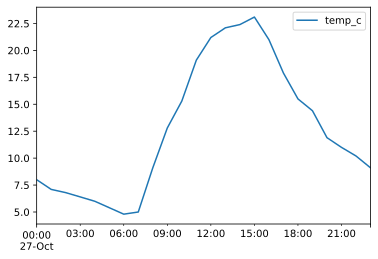

In [94]:
temp.plot()

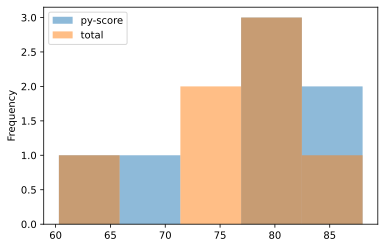

In [96]:
df.loc[:, ['py-score', 'total']].plot.hist(bins=5, alpha=0.5)